In [795]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from jupyterthemes import jtplot
from sklearn.metrics import auc, roc_curve, roc_auc_score
%matplotlib inline
jtplot.style()

In [796]:
data = pd.read_csv('train1.csv')

In [797]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [798]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Столбцы c отсутствующими данными:

In [799]:
nullColList = data.isnull().max()
colNull = list(nullColList[nullColList == True].index)
colNull
data[colNull].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
LotFrontage     1201 non-null float64
Alley           91 non-null object
MasVnrType      1452 non-null object
MasVnrArea      1452 non-null float64
BsmtQual        1423 non-null object
BsmtCond        1423 non-null object
BsmtExposure    1422 non-null object
BsmtFinType1    1423 non-null object
BsmtFinType2    1422 non-null object
Electrical      1459 non-null object
FireplaceQu     770 non-null object
GarageType      1379 non-null object
GarageYrBlt     1379 non-null float64
GarageFinish    1379 non-null object
GarageQual      1379 non-null object
GarageCond      1379 non-null object
PoolQC          7 non-null object
Fence           281 non-null object
MiscFeature     54 non-null object
dtypes: float64(3), object(16)
memory usage: 216.8+ KB


Как видим в признаках есть нулевые данные:
 - для категориалных мы заполним значением _nan пустые значения. после onehotclosing это будет еще один столбец
 - для числовых данных 'LotFrontage', 'MasVnrArea', 'GarageYrBlt' будем в заивисмости от смысла использовать среднее, моду или медиану. второй вариан заменим на значение -999, чтобы алгоритм мог отличать такие данные

In [800]:
#признаки с нулевыми данными и числовым типом
feat_num_null = [col for col in colNull if data[col].dtype != 'O']
#признаки с нулевыми данными и не числовым типом
feat_cat_null = [col for col in colNull if data[col].dtype == 'O']

In [801]:
feat_num_null

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

Исследуюем более детално числовые признаки:

In [802]:
'LotFrontage'
data['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

Список уникальных значений для GarageYrBlt и 81 значение пустое. Это годы постройки гаража - не думаю, что этот признак значаимый. Призак по сути категориальный. Все NA значения заменим на -999, чтобы алгоритм дерева мог отличать такого рода значения.

In [803]:
data['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [804]:
#мода
data['GarageYrBlt'].value_counts().head(1).index[0]
#d_train[num_feat].fillna(-999)

2005.0

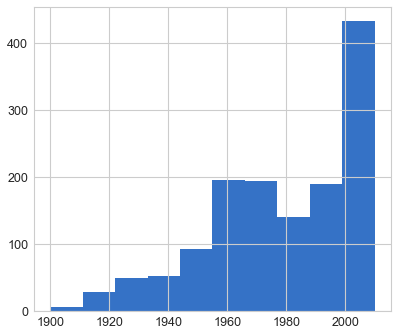

In [805]:
data['GarageYrBlt'].hist()

Список уникальных значений для MasVnrArea достаточно широк и 8 значений пустых. Судя по экпоненциальному распредению пустые значения лучше заменить на медиану, нежели рассматривать среднее значение (актуально было бы для нормального).
вторым вариантом: Все NA значения заменим на -999, чтобы алгоритм дерева мог отличать такого рода значения.

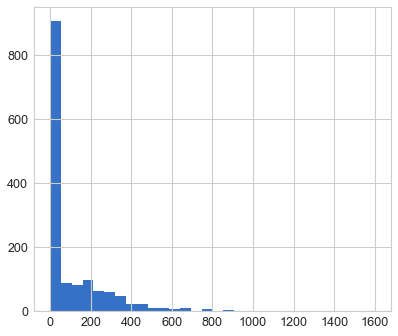

In [806]:
data['MasVnrArea'].hist(bins=30)

In [807]:
data['MasVnrArea'].median()

0.0

Список уникальных значений для LotFrontage достаточно широк и 259 значений пустых. Распределение близко к нормальному поэтому можнои испоьлзовать либо среднее, либо медиану. Так как значения целочисленные, то возьмем медиану. 
вторым вариантом: Все NA значения заменим на -999, чтобы алгоритм дерева мог отличать такого рода значения.

In [808]:
#259 значений отсутствует
data['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

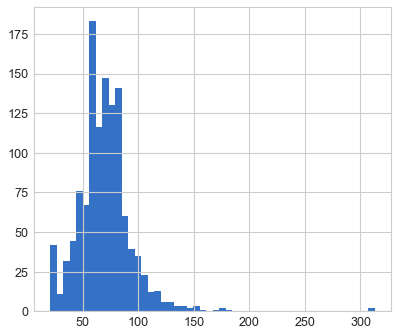

In [809]:
data['LotFrontage'].hist(bins=50)

In [810]:
data['LotFrontage'].median()

69.0

In [811]:
data['LotFrontage'].mean()

70.04995836802665

Заполним пустые значения для числовых и не числовых признаков:

In [812]:
data999 = data.copy()
datam = data.copy()

Далее мы будем рассматривать два датасета:
 - data999 с добавлением в пустые значения -999
 - datam с добавлением в пустые значения  медианного значения

In [813]:
#заполним числовые признаки с значением -999 в отдельный датает
for col in feat_num_null:
    data999.loc[data999[col].isnull(), col] = -999

In [814]:
#заполним числовые признаки с медианным значением в отдельный датает
for col in feat_num_null:
    datam.loc[datam[col].isnull(), col] = data[col].median()

In [815]:
#заполним нечисловые признаки с значением _nan
for col in feat_cat_null:
    data999.loc[data999[col].isnull(), col] = '_nan'
for col in feat_cat_null:
    datam.loc[datam[col].isnull(), col] = '_nan'

Определим категориальные (нечисловые) и числовые (непрерывные) признаки:
Из описания мы видим, что есть группа признаки с числовым типом, но это лишь коды текстовых значений. К ним относятся: 'MSSubClass', 'OverallQual', 'OverallCond' (количество уникальных значений 15, 10, 10 - соответсвтенно).

In [816]:
#так как это список имен признаков, то удалим. Также удалим целевую переменную SalePrice
excl = ['MSSubClass', 'OverallQual', 'OverallCond']
feat_cat = [col for col in data if data[col].dtype == 'O' or col in excl]
feat_num = [col for col in data if data[col].dtype != 'O' and col not in excl]
#удалим признак 'Id', так как он не несет в себе никакой информации (дублирует индексы)
feat_num.remove('Id')
#удалим признак 'Id', так как он является целевой переменной
feat_num.remove('SalePrice')

In [817]:
data999.drop("Id", axis=1, inplace=True)
datam.drop("Id", axis=1, inplace=True)

Выполним OneHotEncoding для категориальных признаков:

In [818]:
data999 = pd.get_dummies(data999, columns=feat_cat)
datam = pd.get_dummies(datam, columns=feat_cat)
#test = pd.get_dummies(test, columns=['LotShape', 'LandContour', 'Utilities'])

In [819]:
#выделим признаки и целевую переменную в соответствующие переменные X и y:
X9 = data999.copy()
X9.drop('SalePrice', axis=1, inplace=True)
y9 = data999['SalePrice'].copy()
Xm = datam.copy()
Xm.drop('SalePrice', axis=1, inplace=True)
ym = datam['SalePrice'].copy()

In [820]:
#test = data[['GarageQual','LotShape', 'LandContour', 'Utilities']].copy()
#test = pd.get_dummies(test, columns=['LotShape', 'LandContour', 'Utilities'])

Поделим исходные датасеты (999 и m) на тренировочную и тестовые выборки:

In [821]:
from sklearn.model_selection import train_test_split

X9_train, X9_test, y9_train, y9_test = train_test_split(X9, y9, test_size=0.3, random_state=0)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, test_size=0.3, random_state=0)


In [822]:
from sklearn.tree import DecisionTreeRegressor

clf_tree9 =  DecisionTreeRegressor(max_depth=4, min_samples_leaf=20)
clf_tree9.fit(X9_train, y9_train)

clf_tree_m =  DecisionTreeRegressor(max_depth=4, min_samples_leaf=20)
clf_tree_m.fit(X9_train, y9_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=20)

Результат решающего дерева примерно 0.75. 
При максимально глубине 20 модель выглядит переобученной, так как на тестовой выборке R2 0.75, а на тренировочной 0.8 
Снижая последовательно максимальную глубину дерева до 4, мы добились, что R2 для тренировочной и тестовой выборок стали близки по значениям 0.74 vs 0.73.
Если далее снижать максимальную глубину, то качество значительно падает (до 0.68)

In [823]:
print('Score for set 999: ')
print(
    'Test data: ', clf_tree9.score(X9_test, y9_test), ', Train data: ', clf_tree9.score(X9_train, y9_train)) 

Score for set 999: 
Test data:  0.7344432887079713 , Train data:  0.7434965212299172


In [824]:
print('Score for set median: ')
print(
    'Test data: ', clf_tree_m.score(Xm_test, ym_test), ', Train data: ', clf_tree_m.score(Xm_train, ym_train))

Score for set median: 
Test data:  0.7344432887079713 , Train data:  0.7434965212299172


Оценим значимость признаков (в большей степени для этого и использовали одиноное дерево):
    - BsmtQual (низкий)
    - ExterQual (низкий)
    - OverallQual (очень низкий)
    - GarageCars (очень значимый)
    - GrLivArea (значимый)
    - 1stFlrSF (очень низкий)
    - TotalBsmtSF (очень низкий)
    - YearBlt (низкий)
    - LotArea (Оочень низчкий)
Значимость остальных признаком блика к нулю.

([<matplotlib.axis.YTick at 0x20e63226d88>,
 <a list of 335 Text yticklabel objects>)

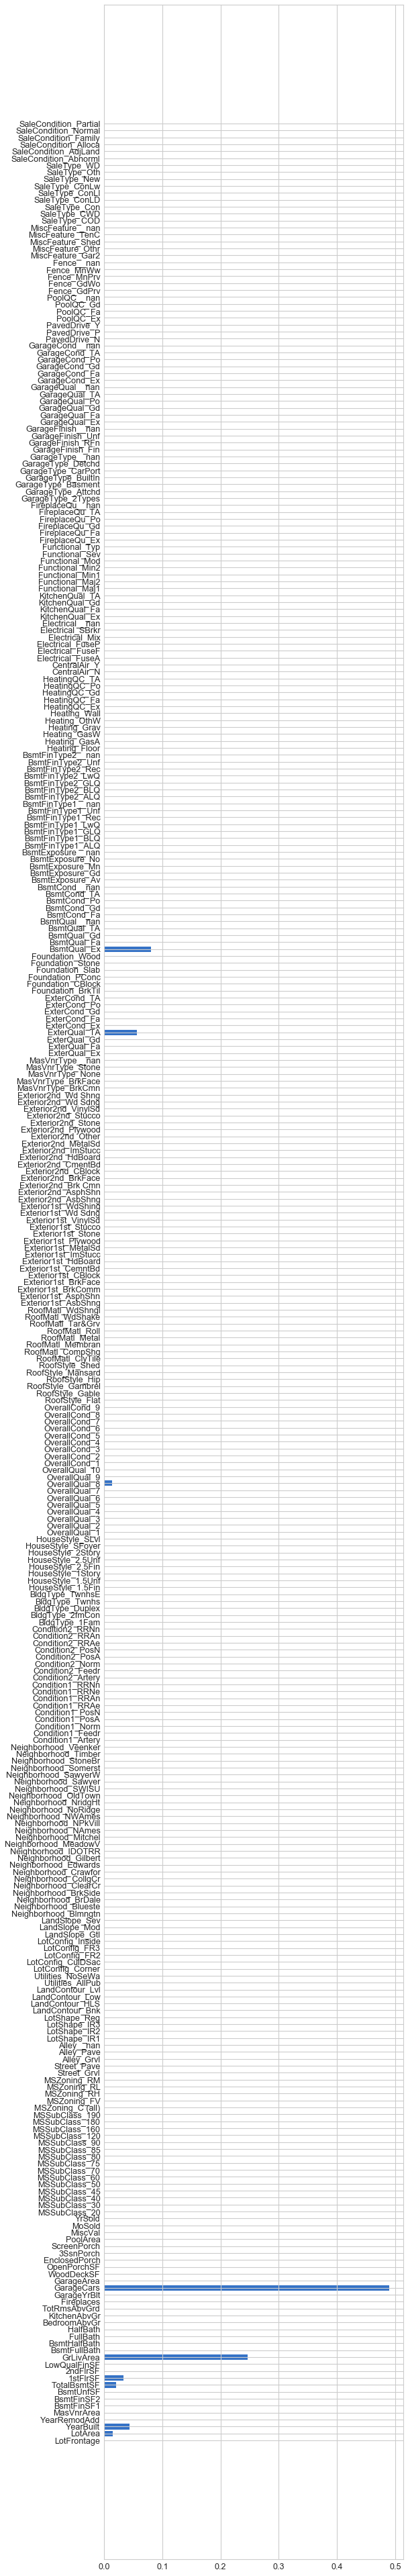

In [825]:
clf_tree9.feature_importances_
plt.figure(figsize=(8, 70))
plt.barh(np.arange(len(clf_tree9.feature_importances_)), clf_tree9.feature_importances_)
plt.yticks(np.arange(len(X9.columns)),X9.columns)

([<matplotlib.axis.YTick at 0x20e66a82cc8>,
 <a list of 335 Text yticklabel objects>)

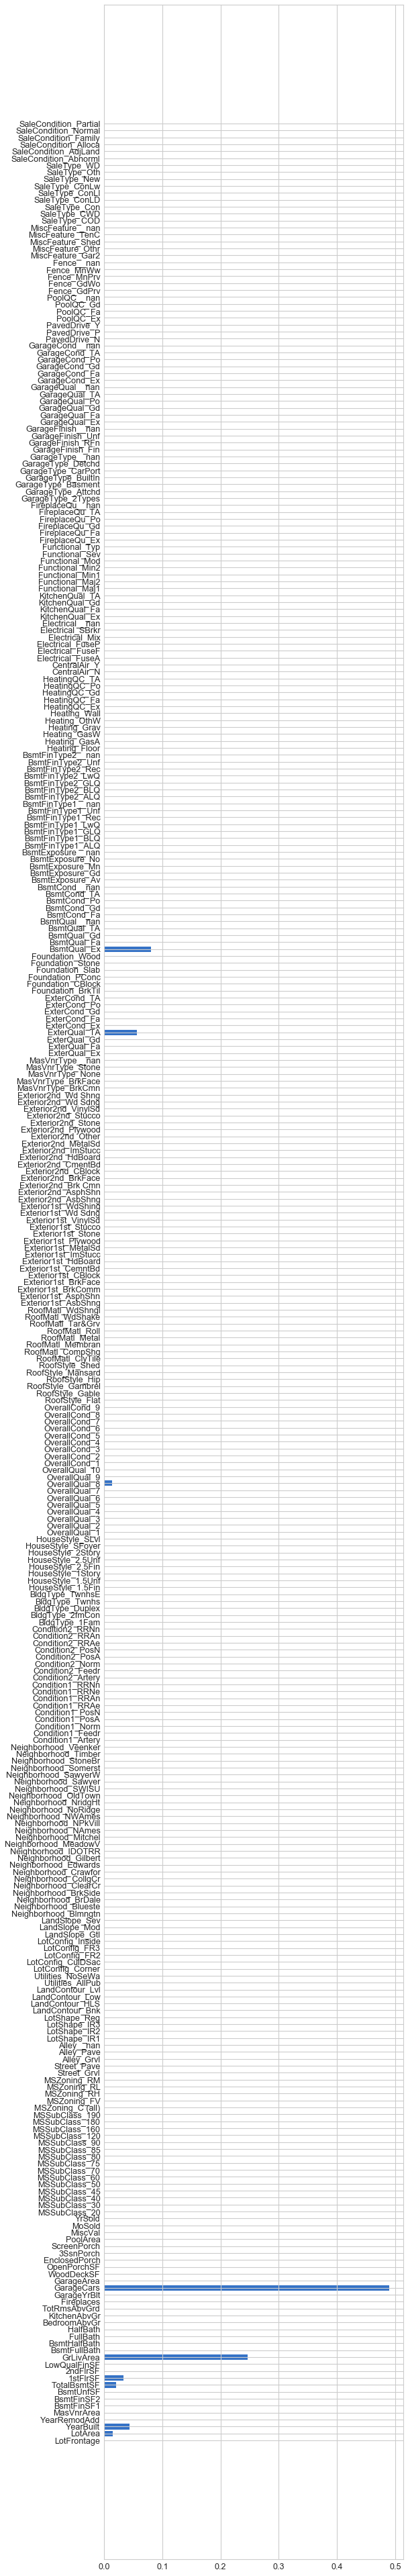

In [826]:
clf_tree_m.feature_importances_
plt.figure(figsize=(8, 70))
plt.barh(np.arange(len(clf_tree_m.feature_importances_)), clf_tree_m.feature_importances_)
plt.yticks(np.arange(len(Xm.columns)),Xm.columns)

Применим метод слаучайного леса для построения регрессии:

In [827]:
from sklearn.ensemble import RandomForestRegressor

rfr9 = RandomForestRegressor(max_depth=4, min_samples_leaf=9)
rfr9.fit(X9_train, y9_train)
rfr_m = RandomForestRegressor(max_depth=4, min_samples_leaf=9)
rfr_m.fit(Xm_train, ym_train)

RandomForestRegressor(max_depth=4, min_samples_leaf=9)

Оценим результаты:
    - При использовании параметров по умолчанию видим, что оценка R2 для тестовой и тренировочной выборки сильно отличаются 0.85(тест) против 0.97 (тренировочная)
    - Поробуем подобрать параметры. при снижении при снижении максимальной глубины точность модели падает, но при этом разность оценки R2 для моделей между тестововй и тренировочной выборками сокращается. значение маскмаьлной глубины 4 оказалось отимальным
    - далее попробовали уменьшить минимально количество данных в листьях дерева до 9. получили небольшой прирост в качестве и еще немного сократили разность между R2 для тестовой и тренировочный выборок

Итого: оценка качества R2 для тестовой выборки 0.81, для тренировочной - 0.83. Для версии с медианой результаты чуть лучше.

In [828]:
print('Score of Randoм Forest Regression for set 999: ')
print(
    'Test data: ', rfr9.score(X9_test, y9_test), ', Train data: ', rfr9.score(X9_train, y9_train)) 

Score of Randoм Forest Regression for set 999: 
Test data:  0.8124991553444633 , Train data:  0.8380866560709468


In [829]:
print('Score for set median: ')
print(
    'Test data: ', rfr_m.score(Xm_test, ym_test), ', Train data: ', rfr_m.score(Xm_train, ym_train))

Score for set median: 
Test data:  0.8101958266182373 , Train data:  0.8389273636152401


Оценим занчимость признаков: значимость признаков, выявленных при дереве решений те же, но также проявилась значимость других признаков. И это понятно, так как выбираются не все признаки разом, а группами, что позволяет выявить их влияние на фоне меньего количества (в грппе каждого дерева) менее значимых признаков.

([<matplotlib.axis.YTick at 0x20e5bc51ec8>,
 <a list of 335 Text yticklabel objects>)

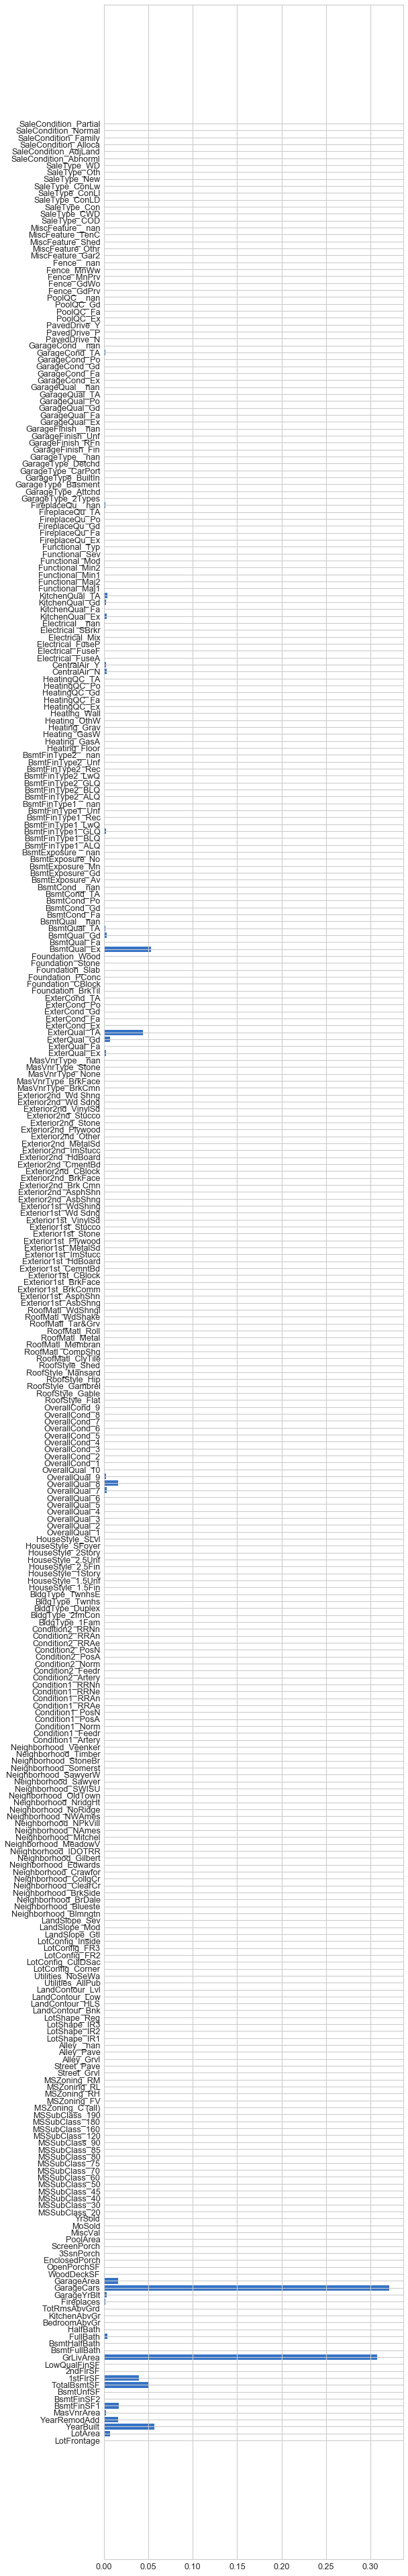

In [830]:
rfr9.feature_importances_
plt.figure(figsize=(8, 70))
plt.barh(np.arange(len(rfr9.feature_importances_)), rfr9.feature_importances_)
plt.yticks(np.arange(len(X9.columns)),X9.columns)

([<matplotlib.axis.YTick at 0x20e676f90c8>,
 <a list of 335 Text yticklabel objects>)

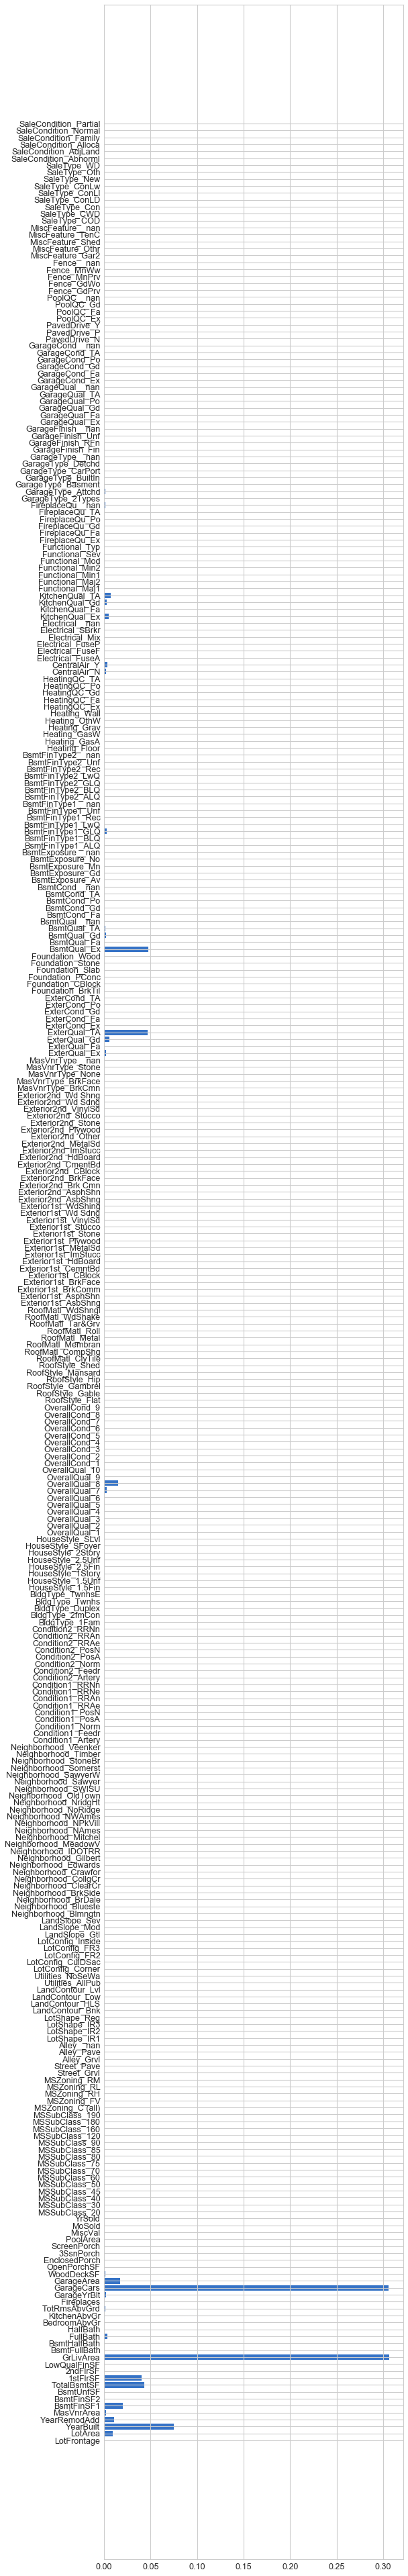

In [831]:
rfr_m.feature_importances_
plt.figure(figsize=(8, 70))
plt.barh(np.arange(len(rfr_m.feature_importances_)), rfr_m.feature_importances_)
plt.yticks(np.arange(len(Xm.columns)),Xm.columns)

Попробуем применить стеккинг

In [832]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures

In [833]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Xm_train[feat_num])

Xm_train[feat_num] = scaler.transform(Xm_train[feat_num])
Xm_test[feat_num] = scaler.transform(Xm_test[feat_num])

C:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramFiles\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [834]:
Stacking_Regressor = StackingRegressor(
    [
        ('linr', LinearRegression()),
        ('rf', RandomForestRegressor(max_depth=4, min_samples_leaf=9, random_state=42)),
        ('svr', SVR()),
        ('dt', DecisionTreeRegressor())
    ],
RandomForestRegressor())

In [835]:
Stacking_Regressor.fit(Xm_train, ym_train)

StackingRegressor(estimators=[('linr', LinearRegression()),
                              ('rf',
                               RandomForestRegressor(max_depth=4,
                                                     min_samples_leaf=9,
                                                     random_state=42)),
                              ('svr', SVR()), ('dt', DecisionTreeRegressor())],
                  final_estimator=RandomForestRegressor())

In [836]:
print(
    ' r2 score for stacking regression model: ', Stacking_Regressor.score(Xm_test, ym_test),
    '\n r2 score for linear regression model: ', Stacking_Regressor.named_estimators_['linr'].score(Xm_test, ym_test),
    '\n r2 score for Random Forest regression model: ', Stacking_Regressor.named_estimators_['rf'].score(Xm_test, ym_test),
    '\n r2 score for Support Vector regression model: ', Stacking_Regressor.named_estimators_['svr'].score(Xm_test, ym_test),
    '\n r2 score for Deceision Tree regression model: ', Stacking_Regressor.named_estimators_['dt'].score(Xm_test, ym_test),
)

 r2 score for stacking regression model:  0.8484814906817584 
 r2 score for linear regression model:  -2.119690466253054e+19 
 r2 score for Random Forest regression model:  0.8121900569463617 
 r2 score for Support Vector regression model:  -0.05058144967412703 
 r2 score for Deceision Tree regression model:  0.7799749327498714


Как видим применение стэккинга улучшило результат R2 модели с 0.85 до 0.86. Также видны сильно более худшие результаты по R2 у моделей по отдельности.